In [1]:
# Imports
from shipnet_randv1 import MultiPlex,ShipNET


import datetime
import os
import time

# Scientific computing imports
import itertools
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas
import seaborn; seaborn.set()

In [2]:
# set directory
os.chdir("C:\Users\colinsh\Documents\compship\Data")
os.listdir("./")

['simple_ship_perm',
 'test',
 'warship_0bh',
 'warship_0bh_2r',
 'warship_0bh_shortest',
 'warship_7bh',
 'warship_7bh_2r',
 'warship_7bh_shortest',
 'warship_no_h',
 'warship_no_h_split',
 'warship_perm',
 'warship_simple_h']

In [10]:
# Now, we'll define our methods to store a model's output

def store_model_parameters(model, run_output_path):
    """
    Store model parameters from a model to the run output path.
    """
    # Create parameters dictionary
    model_parameters = {"num_bh": model.num_bh,
                        "height_dc": model.height_dc,
                        "redundancy": model.redundancy,
                        "permeability": model.permeability,
                        "num_paths": model.num_paths,
                        "method": model.method,
                       }
    # Convert to dataframe and save
    model_parameters_df = pandas.DataFrame(model_parameters.items(),
                             columns=["parameter", "value"])
    model_parameters_df.to_csv(os.path.join(run_output_path, "parameters.csv"),index=False)#,index=False
    

def store_model_csv(model, run_output_path):
    """
    Store CSV data from a model to the run output path.
    """
    # Create interaction dataframe
    
    # Save the dataframes
    model.arr_a_list[0].to_csv(os.path.join(run_output_path, "affordance_incidence.csv"),index=False)
    model.arr_ae_list[0].to_csv(os.path.join(run_output_path, "affordance_edge_incidence.csv"),index=False)
    model.arr_n_cmplx_list[0].to_csv(os.path.join(run_output_path, "node_complexity.csv"),index=False)
    model.arr_a_cmplx_list[0].to_csv(os.path.join(run_output_path, "affordance_complexity.csv"),index=False)
    #model.total_int_list.to_csv(os.path.join(run_output_path, "total_interactions.csv"))
    model.arr_e_list_method[0].to_csv(os.path.join(run_output_path, "route.csv"),index=False)
    model.arr_n_list_method[0].to_csv(os.path.join(run_output_path, "location.csv"),index=False)
    #tsdata_df.to_csv(os.path.join(run_output_path, "timeseries.csv"))
    

def store_model(model, output_path="output"):
    """
    Store a model to the model output path.
    """
    # First, we need to make sure the directory exists.
    try:
        os.makedirs(output_path)
    except:
        pass
    
    """
    Next, we need to create a unique timestamp for the model.
    We'll do that using a timestamp of the form: YYYYMMDD-Run#
    
    We then need to create that directory too.
    """
    
    timestamp_suffix = time.strftime("%Y%m%d")
    
    run_id = 0
    run_output_path = os.path.join(output_path,
                                 "ship-bh{0}-h{1}-red{2}-{3}-{4}".format(model.num_bh,
                                                      model.height_dc,
                                                      model.redundancy,
                                                      timestamp_suffix,                   
                                                      run_id))
    # Get a unique run #
    while os.path.exists(run_output_path):
        run_id += 1
        run_output_path = os.path.join(output_path,
                                 "ship-bh{0}-h{1}-red{2}-{3}-{4}".format(model.num_bh,
                                                      model.height_dc,
                                                      model.redundancy,
                                                      timestamp_suffix,                   
                                                      run_id))        

    try:
        os.makedirs(run_output_path)
    except:
        pass
    
    """
    Finally, we need to store data and figures to the path.
    """
    store_model_parameters(model, run_output_path)
    store_model_csv(model, run_output_path)
    

In [36]:
def warship_setup():    
    #Setup 10KT Warship
    warship=MultiPlex()
    warship.add_plex('P')
    warship.add_plex('EM_P')
    warship.add_plex('C')
    warship.add_plex('I')
    warship.add_plex('H')

    #Define nodes
    warship.add_plex_node('GS_1',data={'loc':[],'loc_possible':[(2,2,0)]})
    warship.add_plex_node('GS_2',data={'loc':[],'loc_possible':[(3,0,0)]})
    warship.add_plex_node('AUX_1',data={'loc':[],'loc_possible':[(4,2,0)]})
    warship.add_plex_node('AUX_2',data={'loc':[],'loc_possible':[(5,0,0)]})
    warship.add_plex_node('EM_1',data={'loc':[],'loc_possible':[(1,0,0)]})
    warship.add_plex_node('EM_2',data={'loc':[],'loc_possible':[(2,2,0)]})
    warship.add_plex_node('Chiller_1',data={'loc':[],'loc_possible':[(4,1,0)]})
    warship.add_plex_node('Chiller_2',data={'loc':[],'loc_possible':[(5,1,0)]})
    warship.add_plex_node('Sonar',data={'loc':[],'loc_possible':[(6,1,0)]})
    warship.add_plex_node('CIC_1',data={'loc':[],'loc_possible':[(4,1,4)]})
    warship.add_plex_node('CIC_2',data={'loc':[],'loc_possible':[(2,1,3)]})
    warship.add_plex_node('ADS_1',data={'loc':[],'loc_possible':[(0,0,3)]})
    warship.add_plex_node('ADS_2',data={'loc':[],'loc_possible':[(0,2,3)]})
    warship.add_plex_node('ADS_3',data={'loc':[],'loc_possible':[(7,0,3)]})
    warship.add_plex_node('ADS_4',data={'loc':[],'loc_possible':[(7,2,3)]})
    warship.add_plex_node('VLS',data={'loc':[],'loc_possible':[(1,1,3)]})
    warship.add_plex_node('Radar',data={'loc':[],'loc_possible':[(4,1,5)]})
    warship.add_plex_node('LASER_1',data={'loc':[],'loc_possible':[(2,1,5)]})
    warship.add_plex_node('LASER_2',data={'loc':[],'loc_possible':[(5,1,5)]})
    warship.add_plex_node('Railgun',data={'loc':[],'loc_possible':[(6,1,3)]})
    warship.add_plex_node('Hotel_1',data={'loc':[],'loc_possible':[(2,1,2)]})
    warship.add_plex_node('Hotel_2',data={'loc':[],'loc_possible':[(3,1,2)]})
    warship.add_plex_node('Hotel_3',data={'loc':[],'loc_possible':[(4,1,2)]})
    warship.add_plex_node('Hotel_4',data={'loc':[],'loc_possible':[(5,1,2)]})
    warship.add_plex_node('Machinery_1',data={'loc':[],'loc_possible':[(7,1,1)]})
    warship.add_plex_node('Machinery_2',data={'loc':[],'loc_possible':[(7,1,2)]})
    warship.add_plex_node('Machinery_3',data={'loc':[],'loc_possible':[(0,1,1)]})
    warship.add_plex_node('Comm',data={'loc':[],'loc_possible':[(5,1,4)]})

    ##Add COMMS

    #Define edges
    #EM_P
    warship.add_plex_edge(('GS_1','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','EM_2','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','EM_2','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','EM_2','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','EM_2','EM_P'),data={'paths':[]})

    #P
    warship.add_plex_edge(('AUX_1','Chiller_1','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Chiller_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','CIC_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','CIC_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','CIC_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','CIC_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','VLS','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','VLS','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','LASER_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','LASER_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','LASER_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','LASER_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Railgun','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Railgun','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Machinery_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Machinery_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Machinery_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Machinery_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Machinery_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Machinery_3','P'),data={'paths':[]})

    #C
    warship.add_plex_edge(('Chiller_1','Radar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Radar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Comm','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Comm','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Sonar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Sonar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Railgun','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Railgun','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','VLS','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','VLS','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','LASER_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','LASER_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','LASER_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','LASER_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','CIC_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','CIC_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','CIC_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','CIC_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_3','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_4','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_3','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_4','C'),data={'paths':[]})

    #I
    warship.add_plex_edge(('Radar','CIC_1','I'),data={'paths':[]})
    warship.add_plex_edge(('Radar','CIC_2','I'),data={'paths':[]})
    warship.add_plex_edge(('Sonar','CIC_1','I'),data={'paths':[]})
    warship.add_plex_edge(('Sonar','CIC_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','VLS','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','VLS','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','LASER_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','LASER_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','LASER_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','LASER_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','Railgun','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','Railgun','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_3','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_4','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_3','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_4','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','Comm','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','Comm','I'),data={'paths':[]})

    #H
    #warship.add_plex_edge(('AUX_1','Comm','H'),data={'paths':[]})
    #warship.add_plex_edge(('AUX_1','Machinery_1','H'),data={'paths':[]})
    #warship.add_plex_edge(('AUX_1','Machinery_3','H'),data={'paths':[]})
    #warship.add_plex_edge(('Machinery_1','Machinery_3','H'),data={'paths':[]})
    #warship.add_plex_edge(('Machinery_1','Comm','H'),data={'paths':[]})
    #warship.add_plex_edge(('Machinery_3','Comm','H'),data={'paths':[]})

    for n1 in warship.global_node:
        for n2 in warship.global_node:
            if n1==n2:
                continue
            if (n2,n1) in warship.plex[3].edges():
                continue
            warship.add_plex_edge((n1,n2,'H'),data={'paths':[]})


    ship=ShipNET([8,3,6])
    for x in range(2):
        for z in range (4,6):
            for y in range(3):
                ship.remove_ship_node((x,y,z))
    for x in range(6,8):
        for z in range (4,6):
            for y in range(3):
                ship.remove_ship_node((x,y,z))
    ship.remove_ship_node((0,0,0))
    ship.remove_ship_node((0,1,0))
    ship.remove_ship_node((0,2,0))

In [4]:
#10kt Simple
simpleship=MultiPlex()
simpleship.add_plex('P')
simpleship.add_plex('EM_P')
simpleship.add_plex('C')
simpleship.add_plex('I')
simpleship.add_plex('H')

#Nodes
simpleship.add_plex_node('GS',data={'loc':[],'loc_possible':[(2,1,0)]})
simpleship.add_plex_node('AUX',data={'loc':[],'loc_possible':[(4,1,0)]})
simpleship.add_plex_node('Prop',data={'loc':[],'loc_possible':[(1,1,0)]})
simpleship.add_plex_node('Chiller_1',data={'loc':[],'loc_possible':[(5,1,0)]})
simpleship.add_plex_node('Sonar',data={'loc':[],'loc_possible':[(4,1,5)]})
simpleship.add_plex_node('Comm',data={'loc':[],'loc_possible':[(4,1,3)]})
simpleship.add_plex_node('CIC_1',data={'loc':[],'loc_possible':[(4,1,3)]})
simpleship.add_plex_node('CIC_2',data={'loc':[],'loc_possible':[(2,1,3)]})
simpleship.add_plex_node('D_1',data={'loc':[],'loc_possible':[(0,1,3)]})
simpleship.add_plex_node('D_2',data={'loc':[],'loc_possible':[(6,1,3)]})
simpleship.add_plex_node('D_3',data={'loc':[],'loc_possible':[(2,1,5)]})
simpleship.add_plex_node('Radar',data={'loc':[],'loc_possible':[(5,1,5)]})
simpleship.add_plex_node('Hotel_1',data={'loc':[],'loc_possible':[(2,1,2)]})
simpleship.add_plex_node('Hotel_2',data={'loc':[],'loc_possible':[(5,1,2)]})
simpleship.add_plex_node('Machinery_1',data={'loc':[],'loc_possible':[(0,1,1)]})
simpleship.add_plex_node('Machinery_2',data={'loc':[],'loc_possible':[(7,1,1)]})


#Define edges
#EM_P
simpleship.add_plex_edge(('GS','Prop','EM_P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Prop','EM_P'),data={'paths':[]})

#P
simpleship.add_plex_edge(('AUX','Chiller_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','CIC_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','CIC_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Sonar','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Sonar','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','D_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','D_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','D_3','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Radar','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Radar','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Hotel_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Hotel_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Hotel_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Hotel_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Machinery_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Machinery_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Comm','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Comm','P'),data={'paths':[]})

#C
simpleship.add_plex_edge(('Chiller_1','Radar','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Sonar','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','D_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','D_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','D_3','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','CIC_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','CIC_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Hotel_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Hotel_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Comm','C'),data={'paths':[]})

#I
simpleship.add_plex_edge(('Radar','CIC_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('Radar','CIC_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('Sonar','CIC_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('Sonar','CIC_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','D_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','D_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','D_3','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','D_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','D_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','D_3','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','Comm','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','Comm','I'),data={'paths':[]})

#H
simpleship.add_plex_edge(('AUX','Comm','H'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Machinery_1','H'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Machinery_2','H'),data={'paths':[]})
simpleship.add_plex_edge(('Machinery_1','Machinery_2','H'),data={'paths':[]})
simpleship.add_plex_edge(('Machinery_1','Comm','H'),data={'paths':[]})
simpleship.add_plex_edge(('Machinery_2','Comm','H'),data={'paths':[]})

In [10]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

ship.set_dc_config(['T0','T1','T3','T4','T5','T6','T7','T8',],3,exception=['EM_P','H'],p=.1) #'EM_P','H'
ship.gen_disjoint_sets(simpleship,'shortest',k=1000)

#1030-### for k=10000

In [24]:
cs=list(itertools.chain(["num_bh","height_dc","redundancy",
                         "interactions_type","interactions_total",
                         "node_type","node_total",
                         "edge_type","edge_total"],
                        ship.ship.nodes(),ship.ship.edges()))
output_path="test"
arr_data=[]
c=0
while c<10:
    c+=1
    loc_t,route_t=ship.affordance_routing(warship,1,method='k-shortest'
                                          ,redundancy=2)
    #method[key]['loc']=loc_t
    #method[key]['route']=route_t
    a_t,ae_t=ship.get_incidence(loc_t,route_t)
    n_c_t=ship.node_complexity(loc_t,route_t)
    a_c_t=ship.affordance_complexity(a_t,ae_t)
    t_int=ship.total_interactions(n_c_t,route_t)
    #method[key]['a_inc']=a_t
    #method[key]['ae_inc']=ae_t
    #method[key]['n_cmplx']=n_c_t
    #method[key]['a_cmplx']=a_c_t
    #method[key]['t_int']=t_int
    arr_data.append(list(itertools.chain([ship.num_bh],[ship.height_dc],[ship.redundancy],
                                             t_int[0],
                                             zip(n_c_t[0]['c_f_t'],n_c_t[0]['c_f']),
                                             zip(route_t[0]['c_f_t'],route_t[0]['c_f']))))
    store_model(ship,output_path)
        
t=pandas.DataFrame(arr_data,columns=cs)
t.to_csv(os.path.join(output_path, "arrangement_series.csv"))


ValueError: No axis named 0 for object type <class 'pandas.core.frame.DataFrame'>

In [44]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

cs_type=list(itertools.chain(["num_bh","height_dc","redundancy","permeability",
                         "interactions_type","node_type","edge_type"],
                        ship.ship.nodes(),ship.ship.edges()))
cs_all=list(itertools.chain(["num_bh","height_dc","redundancy","permeability",
                         "interactions_total","node_total","edge_total"],
                        ship.ship.nodes(),ship.ship.edges()))
output_path="warship_all"
arr_data_type=[]
arr_data_all=[]
runs=2
bh_setups=[['T4'],
           ['T2','T6'],
           ['T2','T4','T6'],
           ['T1','T3','T5','T7'],
           ['T1','T2','T4','T6','T7'],
           ['T1','T2','T3','T5','T6','T7'],
           ['T1','T2','T3','T4','T5','T6','T7']]

#bh_setups=[['T1','T3','T5','T7'],
           #['T1','T2','T3','T4','T5','T6','T7']]
            
#bh_setups=[['T1','T2','T3','T4','T5','T6','T7']]
red=2

warship_setup

aff_ship=warship

for bh in bh_setups:
        for bh_height in range(3,4):
            for perm in range(0,6):
                permeability=perm/5.0
                print len(bh),bh_height,red,permeability
                c=0
                while c<runs:
                    #set up new ship
                    ship=ShipNET([8,3,6])
                    for x in range(2):
                        for z in range (4,6):
                            for y in range(3):
                                ship.remove_ship_node((x,y,z))
                    for x in range(6,8):
                        for z in range (4,6):
                            for y in range(3):
                                ship.remove_ship_node((x,y,z))
                    ship.remove_ship_node((0,0,0))
                    ship.remove_ship_node((0,1,0))
                    ship.remove_ship_node((0,2,0))

                    #warship_setup
                    
                    ship.set_dc_config(bh,bh_height,exception=['EM_P'],p=permeability) #'EM_P','H'
                    ship.gen_disjoint_sets(aff_ship,'shortest',k=200)

                    c+=1
                    loc_t,route_t=ship.affordance_routing(aff_ship,1,method='shortest',redundancy=red)
                    #method[key]['loc']=loc_t
                    #method[key]['route']=route_t
                    a_t,ae_t=ship.get_incidence(loc_t,route_t)
                    n_c_t=ship.node_complexity(loc_t,route_t)
                    a_c_t=ship.affordance_complexity(a_t,ae_t)
                    t_int=ship.total_interactions(n_c_t,route_t)
                    #method[key]['a_inc']=a_t
                    #method[key]['ae_inc']=ae_t
                    #method[key]['n_cmplx']=n_c_t
                    #method[key]['a_cmplx']=a_c_t
                    #method[key]['t_int']=t_int
                    #print t_int
                    #print cs_type
                    #print ship.num_bh,ship.height_dc,ship.redundancy,ship.permeability,t_int[0][0]
                    arr_data_type.append(list(itertools.chain([ship.num_bh],[ship.height_dc],[ship.redundancy],[ship.permeability],
                                                         t_int[0][0],n_c_t[0]['c_f_t'],route_t[0]['c_f_t'])))
                    arr_data_all.append(list(itertools.chain([ship.num_bh],[ship.height_dc],[ship.redundancy],[ship.permeability],
                                                         t_int[0][1],n_c_t[0]['c_f'],route_t[0]['c_f'])))
                    store_model(ship,output_path)
                    
                    
t_type=pandas.DataFrame(arr_data_type,columns=cs_type)
t_all=pandas.DataFrame(arr_data_all,columns=cs_all)
                    
t_type.to_csv(os.path.join(output_path, "series_type.csv"),index=False)#,index=False
t_all.to_csv(os.path.join(output_path, "series_all.csv"),index=False)#,index=False

1 3 2 0.0
1 3 2 0.2
1 3 2 0.4
1 3 2 0.6
1 3 2 0.8
1 3 2 1.0
2 3 2 0.0
2 3 2 0.2
2 3 2 0.4
2 3 2 0.6
2 3 2 0.8
2 3 2 1.0
3 3 2 0.0
3 3 2 0.2
3 3 2 0.4
3 3 2 0.6
3 3 2 0.8
3 3 2 1.0
4 3 2 0.0
4 3 2 0.2
4 3 2 0.4
4 3 2 0.6
4 3 2 0.8
4 3 2 1.0
5 3 2 0.0
5 3 2 0.2
5 3 2 0.4
5 3 2 0.6
5 3 2 0.8
5 3 2 1.0
6 3 2 0.0
6 3 2 0.2
6 3 2 0.4
6 3 2 0.6
6 3 2 0.8
6 3 2 1.0
7 3 2 0.0
7 3 2 0.2
7 3 2 0.4
7 3 2 0.6
7 3 2 0.8
7 3 2 1.0


In [120]:
print t_all.loc[t_all['num_bh']==4]

    num_bh  height_dc  redundancy  permeability  interactions_total  \
36       4          3           2           0.0        2.782272e+70   
37       4          3           2           0.0        2.032527e+67   
38       4          3           2           0.2        1.188612e+49   
39       4          3           2           0.2        1.316404e+64   
40       4          3           2           0.4        2.510841e+59   
41       4          3           2           0.4        4.699641e+49   
42       4          3           2           0.6        2.338403e+49   
43       4          3           2           0.6        2.854540e+45   
44       4          3           2           0.8        1.785368e+44   
45       4          3           2           0.8        5.986311e+51   
46       4          3           2           1.0        1.169201e+49   
47       4          3           2           1.0        4.567195e+46   

      node_total    edge_total     (4, 2, 2)     (3, 0, 3)     (7, 1, 3)  \


In [8]:
t_type[ship.ship.nodes()].mean()

(4, 2, 2)    1.993750
(3, 0, 3)    5.218750
(7, 1, 3)    3.231250
(2, 2, 4)    2.212500
(7, 2, 3)    8.000000
(6, 0, 0)    1.712500
(5, 2, 1)    1.677083
(7, 1, 1)    1.675000
(0, 2, 1)    1.241667
(7, 2, 1)    1.275000
(6, 0, 2)    1.879167
(5, 2, 0)    1.552083
(5, 2, 3)    3.691667
(0, 2, 3)    8.000000
(3, 2, 4)    2.170833
...
(5, 1, 2)     5.937500
(0, 0, 2)     1.404167
(7, 0, 0)     1.102083
(2, 1, 4)     7.491667
(7, 0, 2)     4.000000
(2, 1, 2)     4.416667
(5, 2, 5)     1.237500
(4, 2, 4)     2.827083
(1, 1, 1)     1.733333
(2, 2, 2)     1.997917
(2, 1, 0)     4.708333
(1, 1, 3)    16.000000
(2, 2, 0)    16.000000
(4, 2, 0)     4.000000
(3, 0, 1)     3.212500
Length: 117, dtype: float64

In [9]:
t_all[ship.ship.nodes()].mean()

(4, 2, 2)    9.354792e+01
(3, 0, 3)    3.136377e+08
(7, 1, 3)    8.798125e+01
(2, 2, 4)    3.529167e+00
(7, 2, 3)    1.638667e+02
(6, 0, 0)    1.003750e+01
(5, 2, 1)    1.416042e+01
(7, 1, 1)    3.000000e+00
(0, 2, 1)    1.370833e+00
(7, 2, 1)    1.475000e+00
(6, 0, 2)    1.697917e+01
(5, 2, 0)    5.152083e+00
(5, 2, 3)    4.651000e+02
(0, 2, 3)    1.178667e+02
(3, 2, 4)    2.966667e+00
...
(5, 1, 2)      215347.350000
(0, 0, 2)           1.745833
(7, 0, 0)           1.760417
(2, 1, 4)         506.000000
(7, 0, 2)         187.900000
(2, 1, 2)       68051.866667
(5, 2, 5)           1.237500
(4, 2, 4)           7.039583
(1, 1, 1)           3.425000
(2, 2, 2)       55477.681250
(2, 1, 0)      122940.470833
(1, 1, 3)        5610.666667
(2, 2, 0)    93113548.800000
(4, 2, 0)        5066.666667
(3, 0, 1)    21526134.933333
Length: 117, dtype: float64

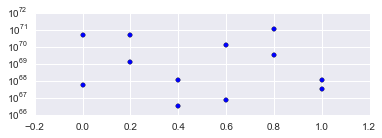

In [42]:
%matplotlib inline
d1=t_all.loc[(t_all['num_bh']==4)]
#print d1
d2=t_all.loc[(t_all['num_bh']==7)]
#print d2
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
ax.scatter(list(d1['permeability']),list(d1['interactions_total']))
ax.set_yscale('log')
#ax.set_ylim(10**10,10**12)

In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [70]:
t_all['int_log']=t_all.apply(lambda row: numpy.log10(row['interactions_total']),axis=1)

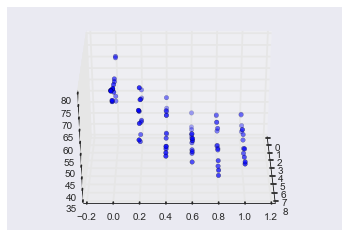

In [112]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(list(t_all['num_bh']),
               list(t_all['permeability']),
               list(t_all['int_log']))
#ax.set_zscale('log')
#ax.set_zlim(10**50,10**51)
ax.view_init(elev=30.,azim=0)

##### 